# 使用手寫辨識資料集, 觀察 PCA 算法

# [教學目標]
- 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以手寫辨識資料集, 觀察 PCA 算法取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [7]:
# 定義 PCA 與隨後的邏輯斯迴歸函數
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [9]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.915):
{'logistic__alpha': 0.01, 'pca__n_components': 64}


In [53]:
print(pca.explained_variance_ratio_.shape)

(64,)


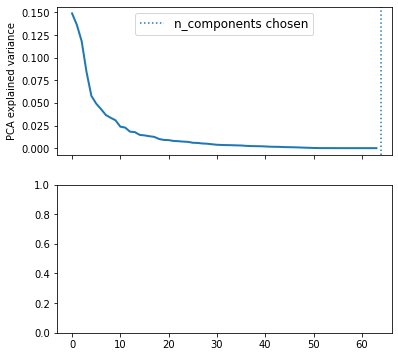

In [55]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [38]:
results = pd.DataFrame(search.cv_results_)
results[results['param_pca__n_components'].values==4]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.155688,0.067394,0.000666,0.000139,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.666667,0.602778,0.676880,0.718663,0.671309,0.667259,0.037174,27
7,1.813121,0.586266,0.000643,0.000196,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.727778,0.683333,0.732591,0.727019,0.690808,0.712306,0.020827,25
14,0.531405,0.045144,0.000530,0.000027,1.0,4,"{'logistic__alpha': 1.0, 'pca__n_components': 4}",0.675000,0.663889,0.721448,0.749304,0.665738,0.695076,0.034271,26
21,0.349541,0.031295,0.000561,0.000023,100.0,4,"{'logistic__alpha': 100.0, 'pca__n_components'...",0.388889,0.350000,0.520891,0.718663,0.623955,0.520480,0.138826,28
28,0.050421,0.008959,0.000582,0.000128,10000.0,4,"{'logistic__alpha': 10000.0, 'pca__n_component...",0.202778,0.194444,0.103064,0.715877,0.615599,0.366353,0.248966,35


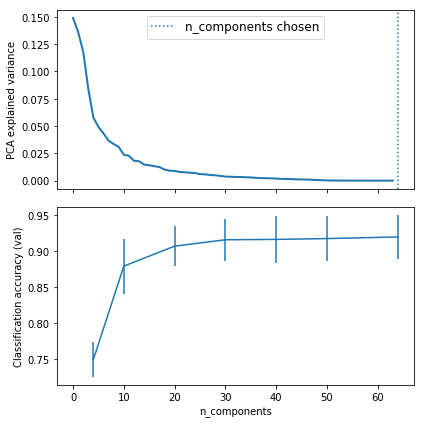

In [5]:
# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

# 觀察結果
* explained variance ratio : 解釋變異性隨著 components 穩定下降
* 分類預測準確率 : 似乎也隨著 components 提升, 但是在 20 以後提升不多

Text(0.5, 1.0, 'A single plot')

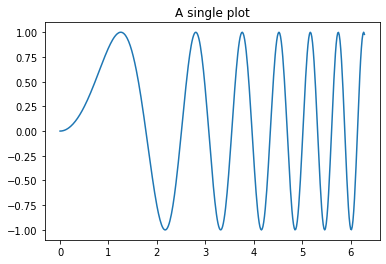

In [4]:
# sphinx_gallery_thumbnail_number = 11
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
# 先畫出第一個圖 plot one graph first
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

## Python Pandas groupby apply lambda arguments

In [43]:
df = pd.DataFrame(np.random.randint(0,11,(10,3)), columns = ['num1','num2','num3'])
df['category'] = ['a','a','a','b','b','b','b','c','c','c']
df = df[['category','num1','num2','num3']]
df


,category,num1,num2,num3
0,a,7,7,8
1,a,5,1,10
2,a,3,0,10
3,b,1,4,10
4,b,0,2,8
5,b,6,10,3
6,b,10,9,0
7,c,10,6,5
8,c,0,0,5
9,c,0,6,5


In [44]:
gb = df.groupby('category')
gb.apply(lambda grp: grp.sum()) 

,category,num1,num2,num3
category,,,,
a,aaa,15,8,28
b,bbbb,17,25,21
c,ccc,10,12,15
